In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_bank = pd.read_csv('./data/bank/bank-full.csv',sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.shape

(45211, 17)

In [5]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_bank.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [8]:
df_bank['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

Text(0, 0.5, 'count')

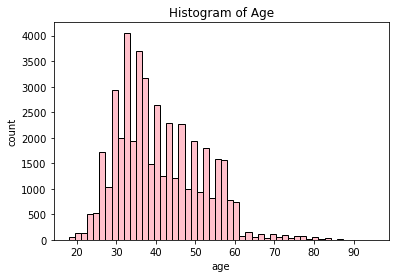

In [9]:
# matplotlib histogram
plt.hist(df_bank['age'], color = 'pink', edgecolor = 'black',
         bins = 50)

plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('count')

In [10]:
df_bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot:>

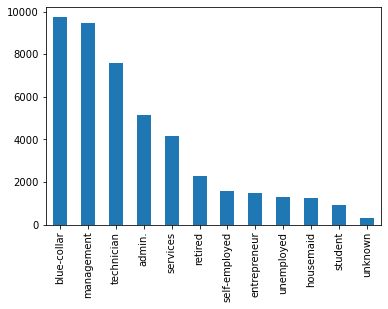

In [11]:
df_bank['job'].value_counts().head(20).plot(kind='bar')

In [12]:
df_bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df_bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
df_bank['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [15]:
df_bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
df_bank['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [17]:
df_bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0, 0.5, 'count')

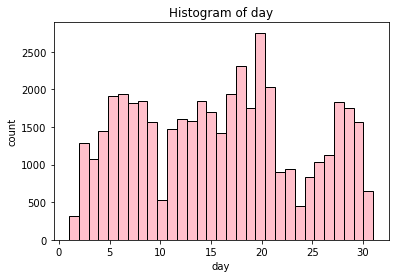

In [18]:
plt.hist(df_bank['day'], color = 'pink', edgecolor = 'black',
         bins = 31)

plt.title('Histogram of day')
plt.xlabel('day')
plt.ylabel('count')

In [19]:
df_bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0, 0.5, 'count')

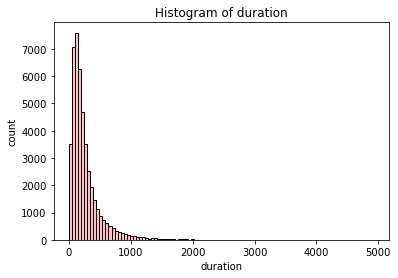

In [20]:
plt.hist(df_bank['duration'], color = 'pink', edgecolor = 'black',
         bins = 100)

plt.title('Histogram of duration')
plt.xlabel('duration')
plt.ylabel('count')

<AxesSubplot:>

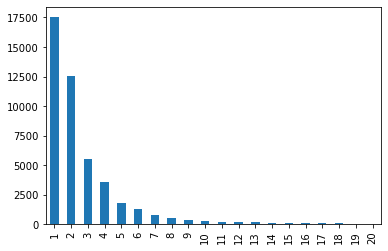

In [21]:
df_bank['campaign'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

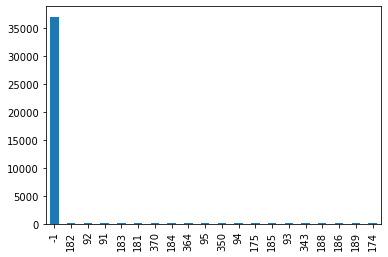

In [22]:
df_bank['pdays'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

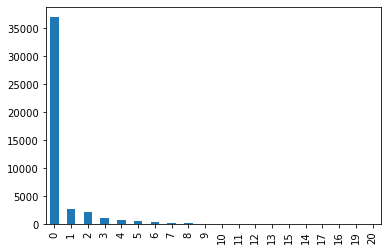

In [23]:
df_bank['previous'].value_counts().head(20).plot(kind='bar')

In [24]:
df_bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [25]:
df_bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [26]:
# approach 1: remove unknown values if sample size is small
df_bank_clean_0 = df_bank.copy()
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['job'] != 'unknown']
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['education'] != 'unknown']

In [27]:
for i in range(len(df_bank_clean_0)):
     if df_bank_clean_0.iloc[i,8] == 'unknown':
        df_bank_clean_0.iloc[i,8] = np.random.choice(['cellular','telephone'],p=[0.91,0.09])

In [28]:
for i in range(len(df_bank_clean_0)):
     if df_bank_clean_0.iloc[i,15] == 'unknown':
        df_bank_clean_0.iloc[i,15] = np.random.choice(['failure','other','success'],p=[0.59,0.22,0.19])

In [29]:
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['age'] <= 70]
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['duration'] <= 480]
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['campaign'] <= 6]

In [30]:
len(df_bank_clean_0)

34727

In [32]:
df_bank_clean_0.to_csv('df_clean.csv')

In [33]:
df = pd.read_csv('df_clean.csv',index_col=0).reset_index()

In [34]:
df.drop(labels=['day','month','index','pdays'],axis=1,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,261,1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,151,1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,76,1,0,failure,no
3,35,management,married,tertiary,no,231,yes,no,cellular,139,1,0,other,no
4,28,management,single,tertiary,no,447,yes,yes,cellular,217,1,0,other,no


In [35]:
#change categorical values into numerical values
df = df.replace('no',0)
df = df.replace('yes',1)

df = df.replace('cellular',0)
df = df.replace('telephone',1)

df = df.replace('success',1)
df = df.replace('failure',0)
df = df.replace('other',0)

In [36]:
for i in range(len(df)):
    if df.loc[i,'job'] == 'management':
        df.loc[i,'job'] = 1
    else:
        df.loc[i,'job'] = 0

In [37]:
for i in range(len(df)):
    if df.loc[i,'marital'] == 'married':
        df.loc[i,'marital'] = 2
    elif df.loc[i,'marital'] == 'single':
        df.loc[i,'marital'] = 1
    else:
        df.loc[i,'marital'] = 0

In [38]:
for i in range(len(df)):
    if df.loc[i,'education'] == 'tertiary':
        df.loc[i,'education'] = 2
    elif df.loc[i,'education'] == 'secondary':
        df.loc[i,'education'] = 1
    else:
        df.loc[i,'education'] = 0

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,58,1,2,2,0,2143,1,0,0,261,1,0,0,0
1,44,0,1,1,0,29,1,0,0,151,1,0,0,0
2,33,0,2,1,0,2,1,1,0,76,1,0,0,0
3,35,1,2,2,0,231,1,0,0,139,1,0,0,0
4,28,1,1,2,0,447,1,1,0,217,1,0,0,0


In [40]:
df.job = df.job.astype('int64')
df.education = df.education.astype('int64')
df.marital = df.marital.astype('int64')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34727 entries, 0 to 34726
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        34727 non-null  int64
 1   job        34727 non-null  int64
 2   marital    34727 non-null  int64
 3   education  34727 non-null  int64
 4   default    34727 non-null  int64
 5   balance    34727 non-null  int64
 6   housing    34727 non-null  int64
 7   loan       34727 non-null  int64
 8   contact    34727 non-null  int64
 9   duration   34727 non-null  int64
 10  campaign   34727 non-null  int64
 11  previous   34727 non-null  int64
 12  poutcome   34727 non-null  int64
 13  y          34727 non-null  int64
dtypes: int64(14)
memory usage: 3.7 MB


In [42]:
from sklearn.model_selection import train_test_split
import numpy as np

In [43]:
X = df.iloc[:, :13]
y = df.iloc[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3,
                            random_state=2)

In [47]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 7.489999999999999 %
In-sample Classification Count: 22293 210 1610 195
Out-of-sample Classification Error: 7.4399999999999995 %
Out-of-sample Classification Count: 9573 91 684 71


/Applications/python-anaconda/install/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, max_depth=7)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.239999999999999 %
In-sample Classification Count: 22431 72 1445 360
Out-of-sample Classification Error: 6.41 %
Out-of-sample Classification Count: 9625 39 629 126


In [49]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 7.51 %
In-sample Classification Count: 22181 322 1504 301
Out-of-sample Classification Error: 7.449999999999999 %
Out-of-sample Classification Count: 9533 131 645 110


In [50]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.29 %
In-sample Classification Count: 22297 206 1324 481
Out-of-sample Classification Error: 6.38 %
Out-of-sample Classification Count: 9564 100 565 190


In [51]:
# Boosting methods
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=0.65,n_estimators=100)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.77 %
In-sample Classification Count: 22282 221 1425 380
Out-of-sample Classification Error: 6.800000000000001 %
Out-of-sample Classification Count: 9557 107 602 153


In [52]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=150) 

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 5.87 %
In-sample Classification Count: 22303 200 1227 578
Out-of-sample Classification Error: 6.4 %
Out-of-sample Classification Count: 9540 124 543 212


In [53]:
# Neural network
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=2000)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 7.449999999999999 %
In-sample Classification Count: 22274 229 1583 222
Out-of-sample Classification Error: 7.5 %
Out-of-sample Classification Count: 9564 100 681 74


In [54]:
from scipy.stats import pearsonr
for i in range(len(df.columns)):
    print(df.columns[i],':',pearsonr(df.iloc[:,i],df['y'])[0])

age : -0.006262441065390461
job : 0.04557929609642366
marital : -0.03029426315150697
education : 0.09730470557888482
default : -0.030768012786176177
balance : 0.051353840255327174
housing : -0.17092331628218338
loan : -0.07657120440813676
contact : -0.013045688276455608
duration : 0.20868722769736742
campaign : -0.0817132096821789
previous : 0.11239577683159696
poutcome : 0.1283093294811501
y : 0.9999999999999768


In [55]:
df_sub_1 = df[['job','education','balance','housing','loan','duration','campaign','previous','poutcome','y']]

In [56]:
X = df_sub_1.iloc[:, :9]
y = df_sub_1.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3,
                            random_state=2)

In [57]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, max_depth=7)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.18 %
In-sample Classification Count: 22387 116 1387 418
Out-of-sample Classification Error: 6.3100000000000005 %
Out-of-sample Classification Count: 9609 55 602 153


In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.34 %
In-sample Classification Count: 22357 146 1394 411
Out-of-sample Classification Error: 6.25 %
Out-of-sample Classification Count: 9602 62 589 166


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=150) 

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.04 %
In-sample Classification Count: 22335 168 1300 505
Out-of-sample Classification Error: 6.41 %
Out-of-sample Classification Count: 9573 91 577 178


In [60]:
df_sub_2 = df[['housing','duration','campaign','previous','poutcome','y']]

In [61]:
X = df_sub_2.iloc[:, :5]
y = df_sub_2.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3,
                            random_state=2)

In [62]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, max_depth=7)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.140000000000001 %
In-sample Classification Count: 22378 125 1367 438
Out-of-sample Classification Error: 6.38 %
Out-of-sample Classification Count: 9598 66 599 156


In [63]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.34 %
In-sample Classification Count: 22357 146 1394 411
Out-of-sample Classification Error: 6.25 %
Out-of-sample Classification Count: 9602 62 589 166


In [64]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=150) 

model.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
print('In-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('In-sample Classification Count:', tn, fp, fn, tp)

tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
print('Out-of-sample Classification Error:', round((fp+fn)/(tn+fp+fn+tp),4)*100, '%')
print('Out-of-sample Classification Count:', tn, fp, fn, tp)

In-sample Classification Error: 6.15 %
In-sample Classification Count: 22359 144 1351 454
Out-of-sample Classification Error: 6.35 %
Out-of-sample Classification Count: 9586 78 584 171
